In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


%matplotlib inline

In [60]:
#Read the dataset file
data = pd.read_csv(r'C:\Users\ERIKA\Desktop\Project_Data\advertising.csv')

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [62]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Simple Linear Regression(TV-Sales)

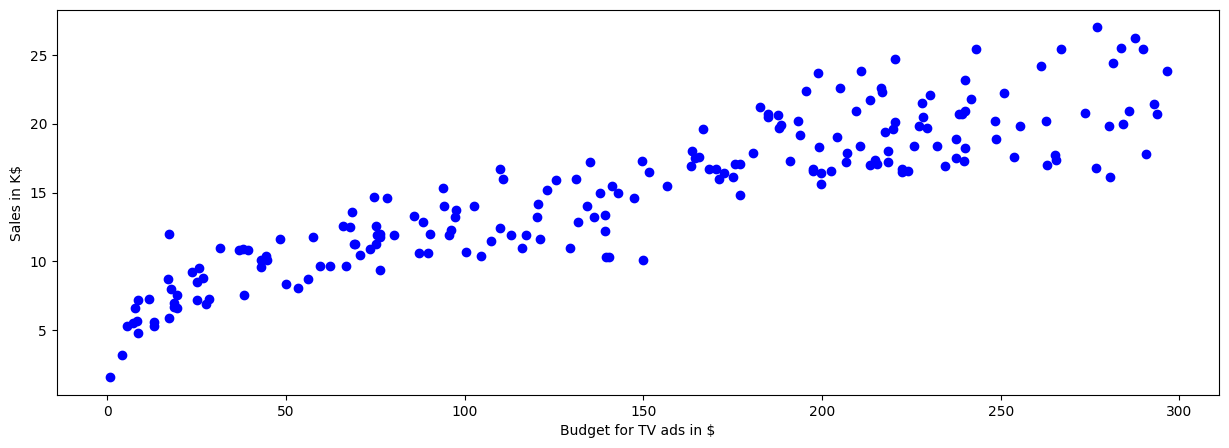

In [63]:
##The effect of TV on sales##
plt.figure(figsize = (15,5))
plt.scatter(data['TV'], data['Sales'], color = 'blue')
plt.xlabel('Budget for TV ads in $')
plt.ylabel('Sales in K$')
plt.show()

In [64]:
X = data['TV'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

In [65]:
reg = LinearRegression()
reg.fit(X, y)

print(f"The Linear model is: \n y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The Linear model is: 
 y = 6.974821488229891 + 0.055464770469558874*TV


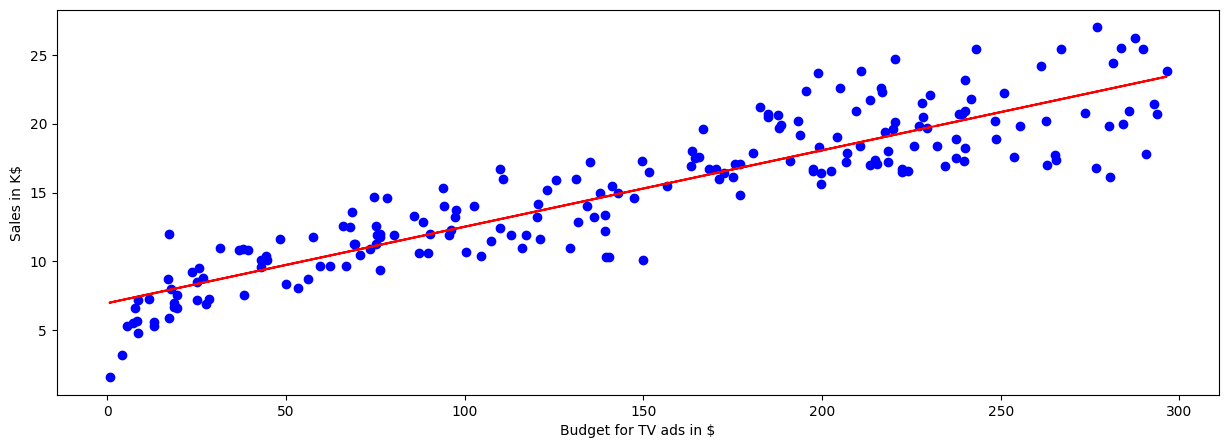

In [66]:
#Plot the fit line
pred = reg.predict(X)
plt.figure(figsize = (15, 5))
plt.scatter(X, y, color = 'blue')
plt.plot(X, pred, color = 'red')
plt.xlabel('Budget for TV ads in $')
plt.ylabel('Sales in K$')
plt.show()

In [67]:
X = data['TV']
y = data['Sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           7.93e-74
Time:                        13:26:23   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

## Simple Linear Regression (Radio-Sales)

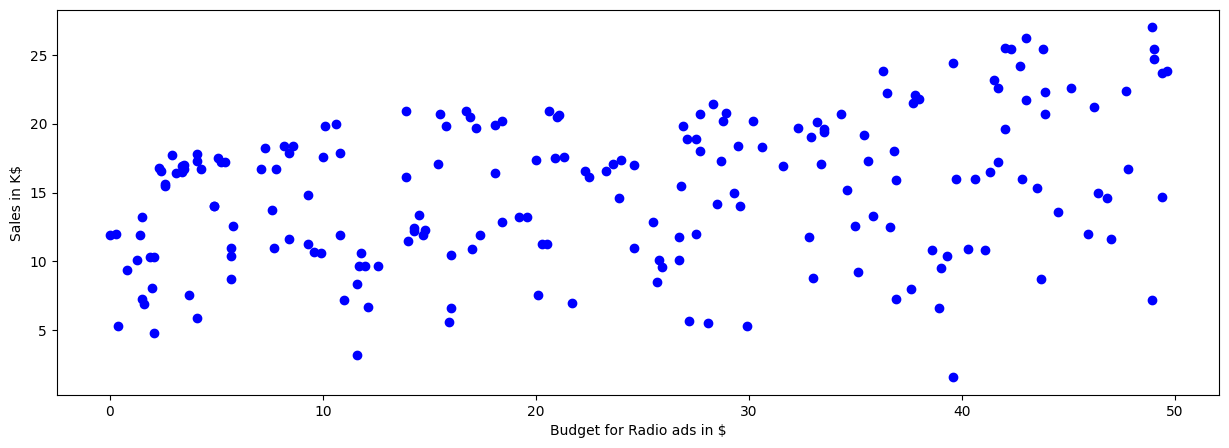

In [68]:
##The effect of TV on sales##
plt.figure(figsize = (15,5))
plt.scatter(data['Radio'], data['Sales'], color = 'blue')
plt.xlabel('Budget for Radio ads in $')
plt.ylabel('Sales in K$')
plt.show()

The Linear model is: 
 y = 12.235721966369233 + 0.12443165550338577*Radio


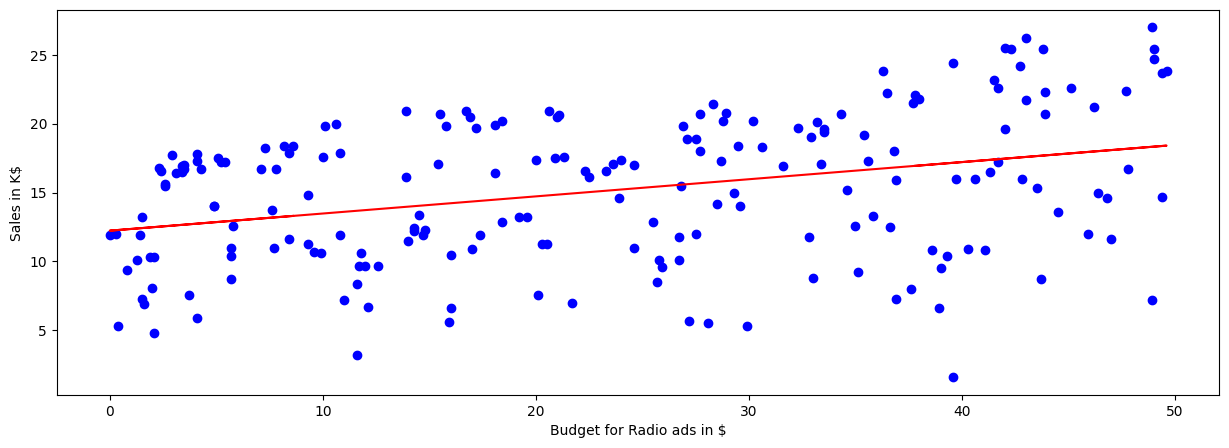

In [76]:
X = data['Radio'].values.reshape(-1, 1)
y = data['Sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

print(f"The Linear model is: \n y = {reg.intercept_[0]} + {reg.coef_[0][0]}*Radio")

#Plot the fit line
pred = reg.predict(X)
plt.figure(figsize = (15, 5))
plt.scatter(X, y, color = 'blue')
plt.plot(X, pred, color = 'red')
plt.xlabel('Budget for Radio ads in $')
plt.ylabel('Sales in K$')
plt.show()

In [70]:
X = data['Radio']
y = data['Sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           3.88e-07
Time:                        13:26:37   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

# Multiple Linear Regression

In [71]:
X_s = data.drop(['Sales'], axis = 1)
y = data['Sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_s,y)

print(f'The linear model is: \n y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*Radio + {reg.coef_[0][2]}*Newspaper')


The linear model is: 
 y = 4.625124078808653 + 0.05444578033757095*TV + 0.1070012282387029*Radio + 0.00033565792233056224*Newspaper


In [72]:
X = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
y = data['Sales'].values.reshape(-1, 1)

In [73]:
exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           8.13e-99
Time:                        13:26:54   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## Multiple Linear Regression without Newspaper

In [74]:
X_s = data.drop(['Sales', 'Newspaper'], axis = 1)
y = data['Sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X_s,y)

print(f'The linear model is: \n y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*Radio')


The linear model is: 
 y = 4.630879464097768 + 0.05444896073124318*TV + 0.10717457133676095*Radio


In [75]:
X = np.column_stack((data['TV'], data['Radio']))
y = data['Sales'].values.reshape(-1, 1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          2.39e-100
Time:                        13:27:32   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0